# CNN on CIFAR-10

# Imports

In [39]:
import time
import torch
import torchvision
import torchvision.transforms as transforms

# Definition CNN Class

In [37]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [38]:
#Generate plot
def graph(label1):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.title('CNN')
    plt.plot(a_epochs, a_loss, label=label1)
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# Definition de Hyperparameter values

In [40]:
epochs=[10,20,30,40,50]
m_batches=[10,50,100,150]

# CNN: Training our model
With different values for epoch and mini-batch hyperparameters.

Files already downloaded and verified
Files already downloaded and verified
[after reshaping]
trainig   data shape  :  torch.Size([10, 3072]) 10 examples
testing   data shape  :  torch.Size([10, 3072]) 10 examples
Mini-batch: 10, Epoch: 11, line:  5000 loss: 1.618
Mini-batch: 10, Epoch: 21, line:  5000 loss: 1.424
Mini-batch: 10, Epoch: 31, line:  5000 loss: 1.255
Mini-batch: 10, Epoch: 41, line:  5000 loss: 1.282
Mini-batch: 10, Epoch: 51, line:  5000 loss: 0.946
Finished Training
[10, 10, 10, 10, 10]
[10, 20, 30, 40, 50]
[1.6175069212913513, 1.4243093311786652, 1.2553665041923523, 1.2823359966278076, 0.9462050199508667]


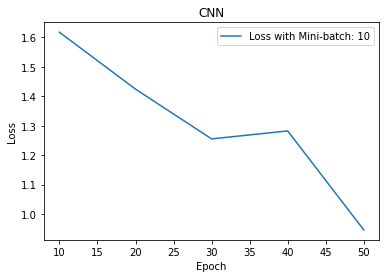

Files already downloaded and verified
Files already downloaded and verified
[after reshaping]
trainig   data shape  :  torch.Size([50, 3072]) 50 examples
testing   data shape  :  torch.Size([50, 3072]) 50 examples
Mini-batch: 50, Epoch: 11, line:  1000 loss: 0.926
Mini-batch: 50, Epoch: 21, line:  1000 loss: 0.927
Mini-batch: 50, Epoch: 31, line:  1000 loss: 0.899
Mini-batch: 50, Epoch: 41, line:  1000 loss: 0.840
Mini-batch: 50, Epoch: 51, line:  1000 loss: 0.867
Finished Training
[50, 50, 50, 50, 50]
[10, 20, 30, 40, 50]
[0.9259900987148285, 0.9265250933170318, 0.8988416135311127, 0.8401602494716645, 0.8674239194393158]


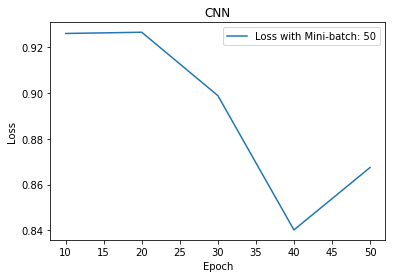

Files already downloaded and verified
Files already downloaded and verified
[after reshaping]
trainig   data shape  :  torch.Size([100, 3072]) 100 examples
testing   data shape  :  torch.Size([100, 3072]) 100 examples
Mini-batch: 100, Epoch: 11, line:   500 loss: 0.818
Mini-batch: 100, Epoch: 21, line:   500 loss: 0.805
Mini-batch: 100, Epoch: 31, line:   500 loss: 0.822
Mini-batch: 100, Epoch: 41, line:   500 loss: 0.808
Mini-batch: 100, Epoch: 51, line:   500 loss: 0.808
Finished Training
[100, 100, 100, 100, 100]
[10, 20, 30, 40, 50]
[0.8179665905237198, 0.8054524856805801, 0.8223872339725494, 0.8080471396446228, 0.8081929433345795]


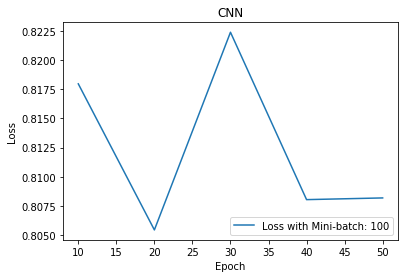

Files already downloaded and verified
Files already downloaded and verified
[after reshaping]
trainig   data shape  :  torch.Size([150, 3072]) 150 examples
testing   data shape  :  torch.Size([150, 3072]) 150 examples
Mini-batch: 150, Epoch: 11, line:   334 loss: 0.774
Mini-batch: 150, Epoch: 21, line:   334 loss: 0.767
Mini-batch: 150, Epoch: 31, line:   334 loss: 0.763
Mini-batch: 150, Epoch: 41, line:   334 loss: 0.760
Mini-batch: 150, Epoch: 51, line:   334 loss: 0.749
Finished Training
[150, 150, 150, 150, 150]
[10, 20, 30, 40, 50]
[0.773553573290507, 0.7666299311319987, 0.7632094685236613, 0.7598942915598551, 0.7494387276967367]


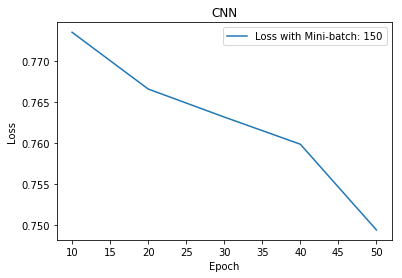

In [41]:
for j in m_batches:
    #download and verify dataset
    transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=j,
                                              shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=j,
                                             shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    # get some random training images
    dataiter = iter(trainloader)
    trainset, y_train = dataiter.next()
    testiter = iter(testloader)
    testset, y_test = testiter.next()

    ten = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    x_train = trainset.reshape((j, 3072))
    y_train1 = list(y_train.flatten())
    x_test = testset.reshape((j, 3072))
    y_test1 = list(y_test.flatten())

    print("[after reshaping]")
    print("trainig   data shape  : ",x_train.shape ,x_train.shape[0], 'examples')
    print("testing   data shape  : ",x_test.shape,x_test.shape[0], 'examples')

    import torch.optim as optim
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    
    #training the model
    a_loss=[]
    a_epochs=[]
    a_batches=[]
    for epoch in epochs:  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if (i+1) % j == 0:  #j=>mini_batch value
                last_rloss=running_loss / j
                running_loss = 0.0
        print('Mini-batch: %d, Epoch: %d, line: %5d loss: %.3f' %
                     (j,epoch + 1, i + 1, last_rloss))
        a_batches.append(j)
        a_epochs.append(epoch)
        a_loss.append(last_rloss)
    print('Finished Training')
    print(a_batches)
    print(a_epochs)
    print(a_loss)
    label1='Loss with Mini-batch: '+str(j)
    graph(label1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

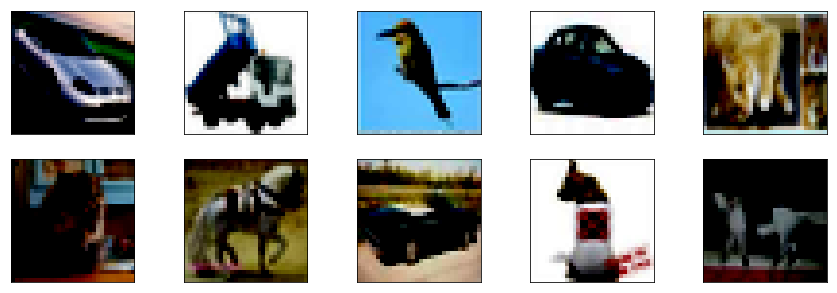

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
figure1 = plt.figure(figsize=(15,5))
for i in range(1,11):
    single_img = np.array(x_train[i])
    single_img_reshaped = np.transpose(np.reshape(single_img,(3, 32,32)), (1,2,0))
    images = figure1.add_subplot(2, 5, i , xticks=[], yticks=[])
    images.imshow(single_img_reshaped)

In [42]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [43]:
outputs = net(images)

In [44]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the test set (10000 images): %d %%' % (
    100 * correct / total))

Accuracy of the test set (10000 images): 65 %
